In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [2]:

data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: >

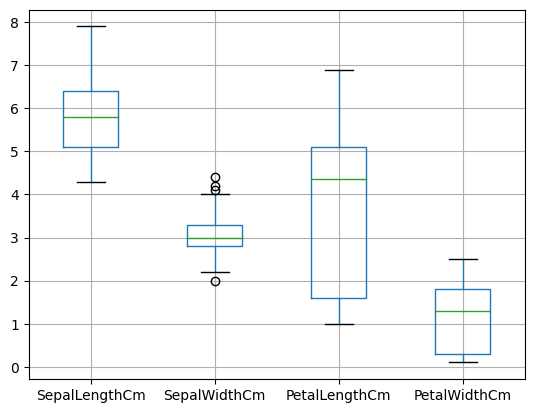

In [3]:

new_data=data.drop(['Id'],axis=1)
new_data.boxplot()

In [6]:
# create arrays
X = new_data.drop('Species',axis=1).values

# instantiate model
nbrs = NearestNeighbors(n_neighbors = 3)

# fit model
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

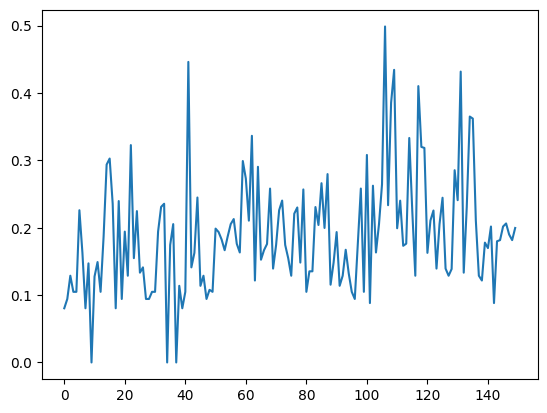

In [7]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(X)
# plot mean of k-distances of each observation

plt.plot(distances.mean(axis =1))

In [8]:
# visually determine cutoff values > 0.15
outlier_index = np.where(distances.mean(axis = 1) > 0.3)
outlier_index

(array([ 15,  22,  41,  62, 100, 106, 108, 109, 114, 117, 118, 119, 131,
        134, 135]),)

In [10]:
# filter outlier values
outlier_values = new_data.iloc[outlier_index]
outlier_values

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,5.7,4.4,1.5,0.4,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
62,6.0,2.2,4.0,1.0,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica


In [11]:
# data wrangling
import pandas as pd
# visualization
import matplotlib.pyplot as plt
# algorithm
from sklearn.cluster import DBSCAN

In [18]:
# input data
df = data[["SepalLengthCm", "SepalWidthCm"]]
# specify & fit model
model = DBSCAN(eps = 0.4, min_samples = 10).fit(df)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1 -1 -1
  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


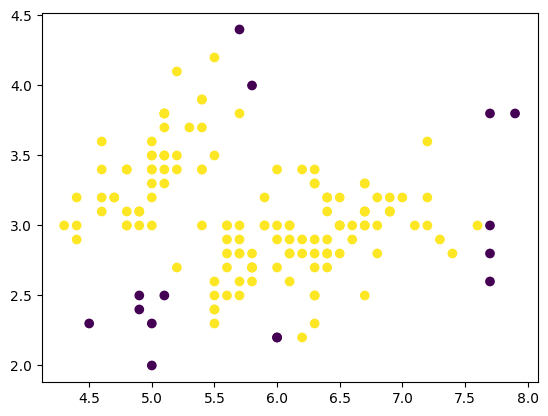

In [16]:
# visualize outputs
colors = model.labels_
plt.scatter(df["SepalLengthCm"], df["SepalWidthCm"], c = colors)

In [19]:
# outliers dataframe
outliers = data[model.labels_ == -1]
print(outliers)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
14    15            5.8           4.0            1.2           0.2   
15    16            5.7           4.4            1.5           0.4   
41    42            4.5           2.3            1.3           0.3   
57    58            4.9           2.4            3.3           1.0   
60    61            5.0           2.0            3.5           1.0   
62    63            6.0           2.2            4.0           1.0   
93    94            5.0           2.3            3.3           1.0   
98    99            5.1           2.5            3.0           1.1   
106  107            4.9           2.5            4.5           1.7   
117  118            7.7           3.8            6.7           2.2   
118  119            7.7           2.6            6.9           2.3   
119  120            6.0           2.2            5.0           1.5   
122  123            7.7           2.8            6.7           2.0   
131  132            